In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Import necessary libraries
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traindata/train.csv
/kaggle/input/testdata/test.csv


In [52]:
#Loading the dataset
train_path="/kaggle/input/traindata/train.csv"
traindata=pd.read_csv(train_path)
test_path="/kaggle/input/testdata/test.csv"
testdata=pd.read_csv(test_path)

In [53]:
#Dropping irrelevant features
def encode_value(value):
    value = value.replace(' Lac+', 'e5').replace(' Crore+', 'e7').replace(' Thou+', 'e3').replace(' Hund+', 'e3')  # Replace ' Lac+' with 'e5' and ' Crore+' with 'e7'
    try:
        result = int(eval(value))  # Evaluate the expression and convert it to an integer
        log_result = np.log(result+1)  # Calculate the logarithm of the value using NumPy
        return result
    except:
        return None
value_counts = traindata['Education'].value_counts()
print(value_counts)
features=traindata.columns
features = features .drop(["ID","Education","Constituency ∇"])
X=traindata[features]
X['Total Assets'] = X['Total Assets'].apply(encode_value)
X['Liabilities'] = X['Liabilities'].apply(encode_value)

Education
Graduate                 531
Post Graduate            432
12th Pass                349
Graduate Professional    339
10th Pass                227
8th Pass                  78
Doctorate                 52
Others                    28
Literate                  14
5th Pass                   9
Name: count, dtype: int64


/tmp/ipykernel_33/2636245700.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Total Assets'] = X['Total Assets'].apply(encode_value)
/tmp/ipykernel_33/2636245700.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Liabilities'] = X['Liabilities'].apply(encode_value)


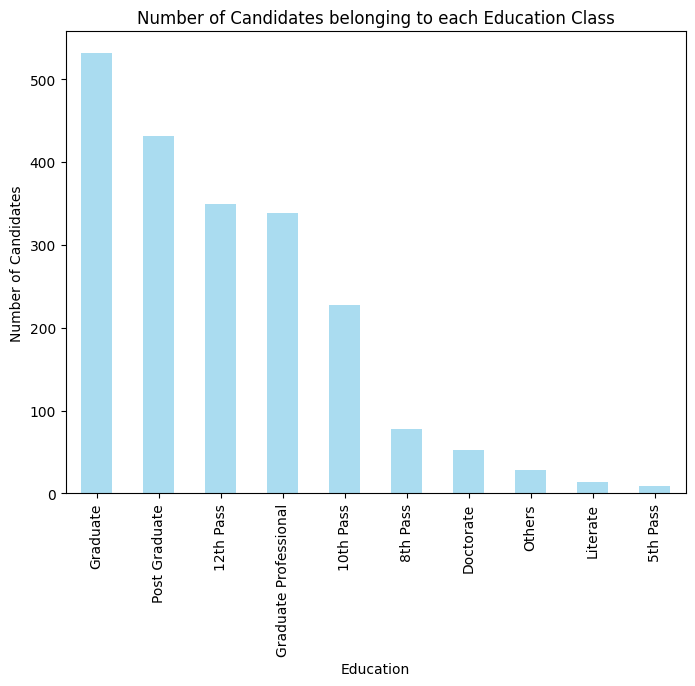

In [54]:
#Distribution of education 
value_counts.plot(kind='bar', figsize=(8, 6), color='skyblue', alpha=0.7)
plt.xlabel('Education')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates belonging to each Education Class')
plt.show()


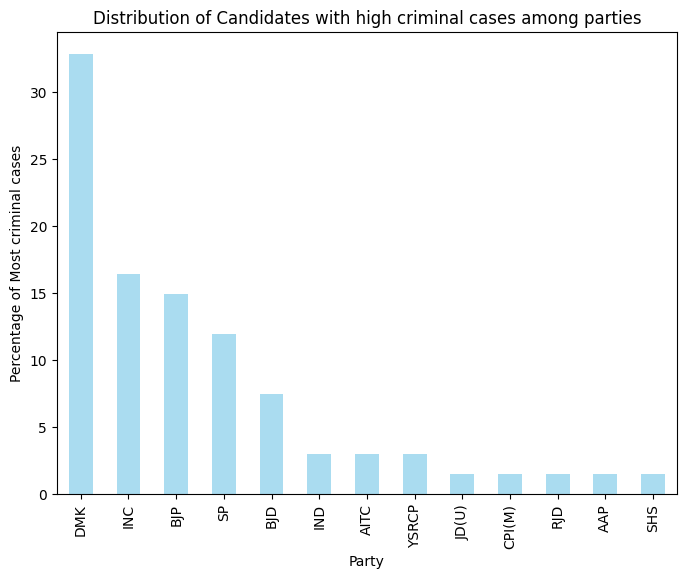

In [55]:
#Data Analysis of Criminal Cases
filtered_X=X[X['Criminal Case']>=10]
filtered_length=len(filtered_X)
value_countscase = filtered_X['Party'].value_counts()
value_countscase1=value_countscase*100/filtered_length
value_countscase1.plot(kind='bar', figsize=(8, 6), color='skyblue', alpha=0.7)
# Add labels and title
plt.xlabel('Party')
plt.ylabel('Percentage of Most criminal cases')
plt.title('Distribution of Candidates with high criminal cases among parties')
plt.show()

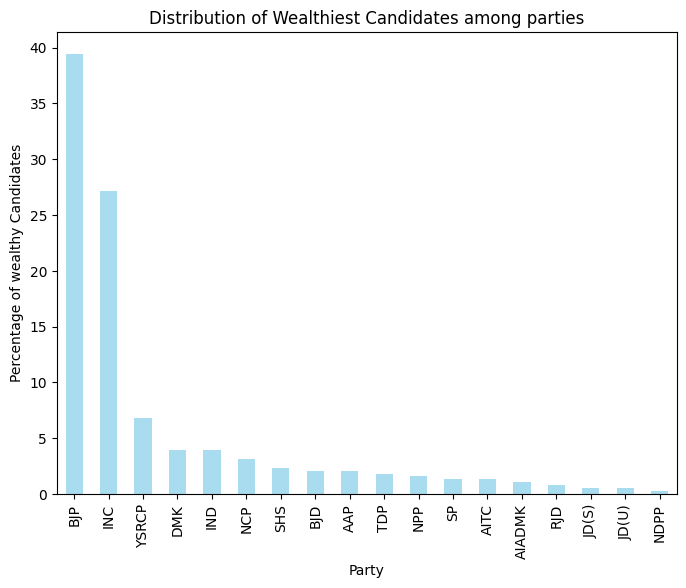

In [56]:
#Data Analysis of Wealth

#Net worth is defined as assets-liabilities
filtered_X=X[X['Total Assets']-X['Liabilities']>=10e7]
filtered_length=len(filtered_X)
value_counts = filtered_X['Party'].value_counts()
value_counts=value_counts*100/filtered_length
value_counts.plot(kind='bar', figsize=(8, 6), color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel('Party')
plt.ylabel('Percentage of wealthy Candidates')
plt.title('Distribution of Wealthiest Candidates among parties')
plt.show()

In [57]:
#Some more preprocessing
def encode_value2(value):
    return np.log(value+1)
def encode_first_word(title):
    first_word = title.split()[0]
    if first_word == 'Dr.':
        return 2
    elif first_word == 'Adv.':
        return 1
    else:
        return 0
y=traindata["Education"]
Xtest=testdata[features]
X["Total Assets"]=X["Total Assets"].apply(encode_value2)
X["Liabilities"]=X["Liabilities"].apply(encode_value2)
Xtest["Total Assets"]=Xtest["Total Assets"].apply(encode_value)
Xtest["Liabilities"]=Xtest["Liabilities"].apply(encode_value)
Xtest["Total Assets"]=Xtest["Total Assets"].apply(encode_value2)
Xtest["Liabilities"]=Xtest["Liabilities"].apply(encode_value2)
concatenated_df = pd.concat([X, Xtest], ignore_index=True)
concatenated_df=pd.get_dummies(concatenated_df, columns=['Party', 'state'])
concatenated_df["Candidate"]=concatenated_df["Candidate"].apply(encode_first_word)
encoded_df1 = concatenated_df.iloc[:len(X)]
encoded_df2 = concatenated_df.iloc[len(X):]
encoded_df1.reset_index(drop=True, inplace=True)
encoded_df2.reset_index(drop=True, inplace=True)
X=encoded_df1
Xtest=encoded_df2

/tmp/ipykernel_33/1427792356.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Total Assets"]=X["Total Assets"].apply(encode_value2)
/tmp/ipykernel_33/1427792356.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Liabilities"]=X["Liabilities"].apply(encode_value2)
/tmp/ipykernel_33/1427792356.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

BernoulliNB model

In [58]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Calculate class weights
model = BernoulliNB()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

predictions = model.predict(Xtest)


# Assuming your test data has IDs, create a DataFrame with IDs and predictions
results_df = pd.DataFrame({'ID': testdata['ID'], 'Education': predictions})

# Save the predictions to a CSV file
results_df.to_csv('predictions.csv', index=False)

Accuracy: 0.2354368932038835
[[ 3  5  0  0  0 21  9  0  0 11]
 [ 5  4  0  0  0 32 12  0  0 14]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 4  1  0  0  0  7  4  0  0  4]
 [ 1  0  0  0  2  6  2  0  0  3]
 [ 7 16  0  0  0 50  5  0  0 30]
 [ 1  5  0  0  1 23 16  0  0 20]
 [ 1  0  0  0  0  1  0  0  0  1]
 [ 0  1  0  0  0  2  0  0  0  1]
 [ 2  2  0  0  0 25 29  0  0 22]]
                       precision    recall  f1-score   support

            10th Pass       0.12      0.06      0.08        49
            12th Pass       0.12      0.06      0.08        67
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        20
            Doctorate       0.67      0.14      0.24        14
             Graduate       0.30      0.46      0.36       108
Graduate Professional       0.21      0.24      0.22        66
             Literate       0.00      0.00      0.00         3
               Others       0.00      0.00      0.00         4
        P

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ComplementNB model

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Calculate class weights
model = ComplementNB()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
predictions = model.predict(Xtest)

# Assuming your test data has IDs, create a DataFrame with IDs and predictions
results_df = pd.DataFrame({'ID': testdata['ID'], 'Education': predictions})

# Save the predictions to a CSV file
results_df.to_csv('predictions2.csv', index=False)

Accuracy: 0.21844660194174756
[[ 5  7  0  0  1  9 14  0  1 12]
 [ 9 12  0  1  2 15  9  0  0 19]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 5  2  0  0  0  2  7  0  0  4]
 [ 2  2  0  0  4  3  0  0  0  3]
 [ 8 28  0  0  2 24 19  0  2 25]
 [ 7 12  0  1  6  5 20  0  0 15]
 [ 1  0  0  0  0  1  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  2  1]
 [ 4  8  0  3 12 12 17  0  1 23]]
                       precision    recall  f1-score   support

            10th Pass       0.12      0.10      0.11        49
            12th Pass       0.16      0.18      0.17        67
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        20
            Doctorate       0.15      0.29      0.20        14
             Graduate       0.34      0.22      0.27       108
Graduate Professional       0.23      0.30      0.26        66
             Literate       0.00      0.00      0.00         3
               Others       0.33      0.50      0.40         4
        

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC model

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
smote = BorderlineSMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Calculate class weights
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

predictions = model.predict(Xtest)

# Assuming your test data has IDs, create a DataFrame with IDs and predictions
results_df = pd.DataFrame({'ID': testdata['ID'], 'Education': predictions})

# Save the predictions to a CSV file
results_df.to_csv('predictions3.csv', index=False)

Accuracy: 0.21359223300970873
[[ 0 13  0  1  1 18  6  2  0  8]
 [ 1 14  0  3  1 27  8  2  0 11]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  5  0  1  0  7  2  2  0  3]
 [ 0  1  0  1  3  5  1  0  0  3]
 [ 1 29  0  0  1 42  8  4  1 22]
 [ 0 12  0  2  3 19 11  0  0 19]
 [ 0  0  0  1  0  1  0  0  0  1]
 [ 0  1  0  0  0  2  0  0  0  1]
 [ 2 11  0  6  7 26 10  1  0 17]]
                       precision    recall  f1-score   support

            10th Pass       0.00      0.00      0.00        49
            12th Pass       0.16      0.21      0.18        67
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.07      0.05      0.06        20
            Doctorate       0.19      0.21      0.20        14
             Graduate       0.29      0.39      0.33       108
Graduate Professional       0.24      0.17      0.20        66
             Literate       0.00      0.00      0.00         3
               Others       0.00      0.00      0.00         4
        

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
